<a href="https://colab.research.google.com/github/pranay8297/Stable-Diffusion-Experiments/blob/main/Clustering_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch

In [33]:
!pip install ipdb

In [34]:
from ipdb import set_trace as st

# EinSum Experiments


In [ ]:
a, b = torch.randn((2, 3)), torch.randn((3, 4))
c = a@b
c.shape

torch.Size([2, 4])

In [ ]:
d = torch.einsum('ij,jk->ijk', a, b)

In [ ]:
d.shape

torch.Size([2, 3, 4])

In [ ]:
a, b = torch.randn((3)), torch.randn((3))
c = torch.einsum('i,i->', a, b)

In [ ]:
c

tensor(-0.8417)

In [ ]:
a@b

tensor(-0.8417)

In [ ]:
torch.einsum('i,j->ij', a, b)

tensor([[-0.3864,  0.4579,  0.8651],
        [-0.3129,  0.3709,  0.7006],
        [ 0.3690, -0.4374, -0.8262]])

In [ ]:
a, b

(tensor([-0.5859, -0.4745,  0.5596]), tensor([ 0.6595, -0.7816, -1.4766]))

In [ ]:
a = torch.randn((4, 3))
torch.einsum('ij->ji', a)

tensor([[ 0.6962,  1.2020, -0.6768, -0.1171],
        [-1.4245,  0.4091, -0.4582,  0.9390],
        [-1.1398, -1.1627, -0.2345,  2.4431]])

In [ ]:
a = torch.randn((3, 3))
torch.einsum('ij->i', a)

tensor([-0.0904,  0.6422,  0.1621])

In [ ]:
a

tensor([[-0.1186, -1.1908,  1.2190],
        [ 1.3226, -0.3222, -0.3581],
        [ 0.4255, -0.5418,  0.2784]])

In [ ]:
a = torch.randn((3, 3))
torch.einsum('ij->', a)

tensor(-0.2345)

In [ ]:
a = torch.randn((3, 4))
b = torch.randn((5, 4))
c = torch.einsum('ij,kj->ik', a, b)

In [ ]:
c.shape

torch.Size([3, 5])

In [ ]:
c

tensor([[-0.7606, -0.4931, -0.0574, -2.5396,  0.6466],
        [ 0.4655, -1.8726,  2.8178,  4.0108,  0.4942],
        [-0.8272,  0.0447, -2.2813, -1.6850,  1.4388]])

In [ ]:
(a@b.T) == c

tensor([[ True, False,  True, False,  True],
        [ True,  True,  True, False,  True],
        [False, False, False,  True,  True]])

In [ ]:
c / (a@b.T)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])

# Clustering Problem!

In [ ]:
# step - 1: Generate data and plot that data

# Repeat for some iterations:
# Step - 2: Calculate inter point distance
# step - 3: Take weighted average of those distances and thats the new point.

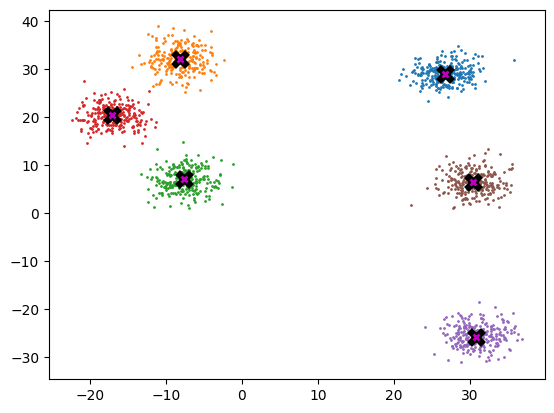

In [35]:
import math, matplotlib.pyplot as plt, operator
from functools import partial
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

torch.manual_seed(42)

n_clusters=6
n_samples =250
centroids = torch.rand(n_clusters, 2)*70-35

def sample(m):
  return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

slices = [sample(c) for c in centroids]
data = torch.cat(slices, dim = 0)
data.shape

def plot_data(centroids, data, n_samples, ax=None, plot_centroids = True):

    if ax is None:
        _,ax = plt.subplots()

    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)

        if plot_centroids:
            ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
            ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

plot_data(centroids, data, 250)

# Mean Shift


In [6]:
def gaussian(x, sigma = 2.5):

  '''
  Returns corrosponding value of x based on gaussian normal distribution.

  Args:
    x: torch.Tensor or torch.tensor
    sigma: float

  Returns:
    torch.Tensor or torch.tensor

  '''
  return (1/sigma*math.sqrt(2*math.pi))*torch.exp(-0.5*(x/sigma)**2)

In [8]:
gaussian(tensor(1.4))

tensor(0.8571)

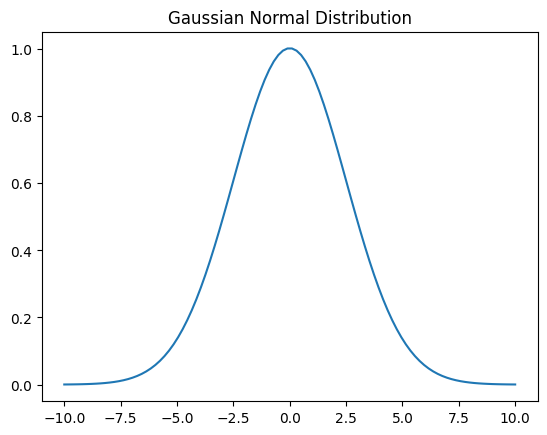

In [7]:
def plot_func(f):
    x = torch.linspace(-10,10,100)
    plt.plot(x, f(x))
    plt.title('Gaussian Normal Distribution')
plot_func(gaussian)

In [ ]:
X = data.clone()
x = X[0]

In [ ]:
x.shape, X.shape, x[None].shape

(torch.Size([2]), torch.Size([1500, 2]), torch.Size([1, 2]))

In [ ]:
# calculate the differences
diff = x - X

# square the differences and sum them and square root
distance = torch.sqrt((diff**2).sum(1))

In [ ]:
distance[:10], distance[-10:],

(tensor([0.0000, 3.8986, 4.8342, 3.7265, 6.2729, 4.1222, 6.5598, 6.0017, 3.4882,
         5.1295]),
 tensor([22.2515, 19.7583, 22.1499, 22.8804, 17.3239, 16.6871, 23.6415, 17.6275,
         22.6095, 21.6175]))

In [ ]:
# Calcuate weights
weights = gaussian(distance)

In [ ]:
weights

tensor([1.0027e+00, 2.9722e-01, 1.5460e-01,  ..., 1.6044e-11, 1.7399e-18,
        5.8201e-17])

In [ ]:
weights.shape, X.shape, weights[None, :].shape, weights[:, None].shape

(torch.Size([1500]),
 torch.Size([1500, 2]),
 torch.Size([1, 1500]),
 torch.Size([1500, 1]))

In [ ]:
n = (weights[:, None]*X).sum(0)/weights.sum()

In [ ]:
x, n

(tensor([26.2037, 26.3486]), tensor([26.4402, 28.0381]))

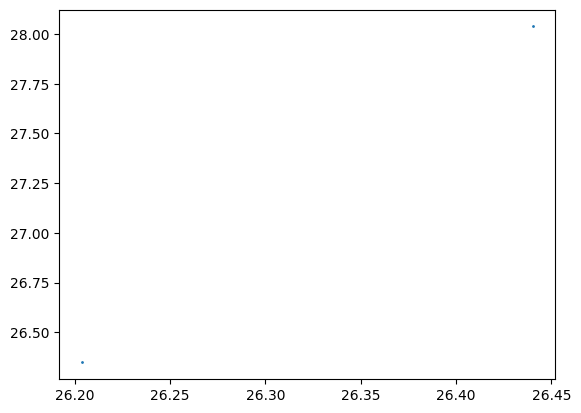

In [ ]:
plt.scatter([n[0], x[0]], [n[1], x[1]], s=1)

In [ ]:
def one_update(X, bandwidth = 2.5):

  for i, x in enumerate(X):
    # calculate distance
    distance = ((x - X)**2).sum(1).sqrt()
    weights = gaussian(distance, sigma = bandwidth)
    weighted_avg = (X*weights[:, None]).sum(0)/weights.sum()
    X[i] = weighted_avg

In [ ]:
X = data.clone()
one_update(X)

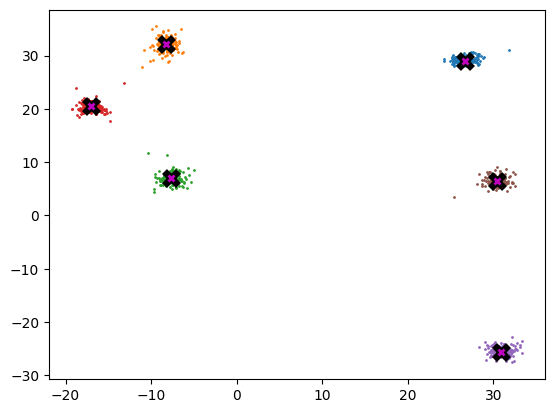

In [ ]:
plot_data(centroids, X, 250)

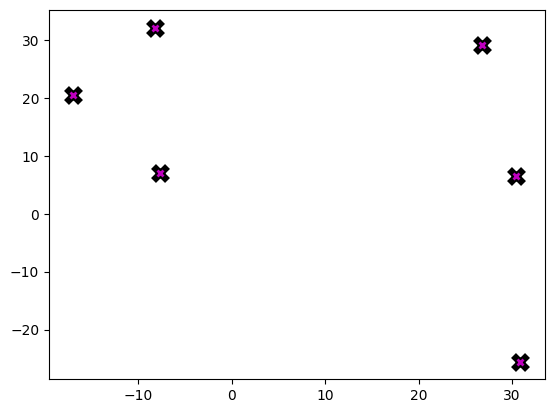

In [ ]:
one_update(X)
plot_data(centroids, X, 250)

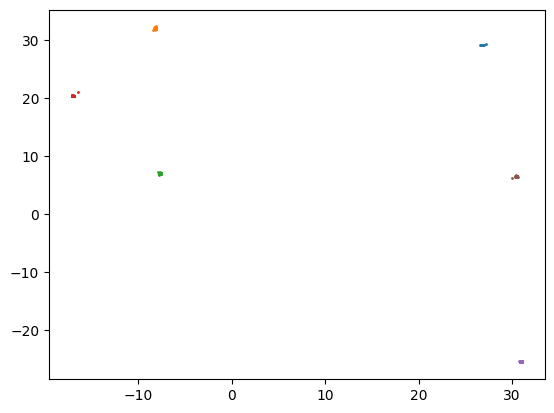

In [ ]:
plot_data(centroids, X, 250, plot_centroids=False)

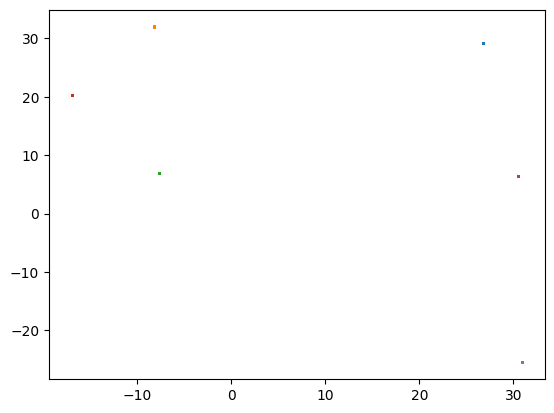

In [ ]:
one_update(X)
plot_data(centroids, X, 250, plot_centroids=False)

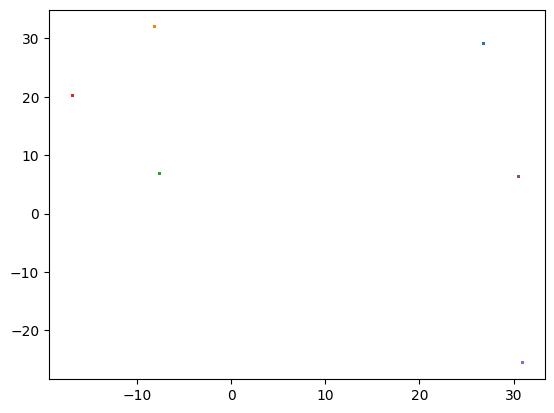

In [ ]:
one_update(X)
plot_data(centroids, X, 250, plot_centroids=False)

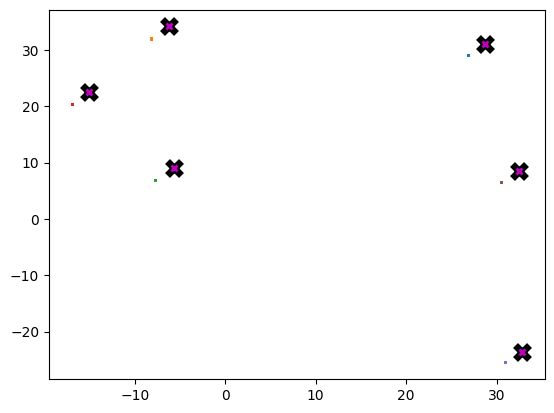

In [ ]:
plot_data(centroids + 2, X, 250, plot_centroids=True)

In [ ]:
def mean_shift(data, bandwidth = 2.5):
  X = data.clone()
  for i in range(5):
    one_update(X)
  return X

In [ ]:
data.shape

torch.Size([1500, 2])

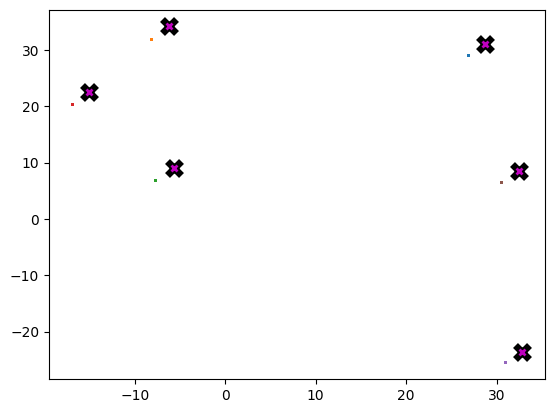

In [ ]:
nd = mean_shift(data)
plot_data(centroids + 2, nd, 250, plot_centroids=True)

# Animation

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
?? FuncAnimation

In [ ]:
fig, ax = plt.subplots()
def do_one(frame):
  if frame: one_update(X)
  ax.clear()
  plot_data(centroids+2, X, n_samples = 250, ax = ax)

X = data.clone()
ani = FuncAnimation(fig, do_one, frames = 5, interval = 1000, repeat = False)
plt.close()
HTML(ani.to_jshtml())

# Using CUDA

In [ ]:
# Lets do batches

In [ ]:
X = data.clone()

In [ ]:
X.shape

torch.Size([1500, 2])

In [ ]:
x = X[:5]
x.shape

torch.Size([5, 2])

In [ ]:
#calculate differences
# (a[None]-b[:,None])
X[None].shape, x[:, None].shape

(torch.Size([1, 1500, 2]), torch.Size([5, 1, 2]))

In [ ]:
diff = X[None, :] - x[:, None, :]

In [ ]:
distance = (diff**2).sum(-1)

In [ ]:
distance.shape

torch.Size([5, 1500])

In [ ]:
# Get Distances
def get_distance_batch(a, b):
  '''
  a - (n*2)
  b - (m*2)

  return - (m*n*1)
  '''

  diff = b[:, None, :] - a[None, :]
  return (diff**2).sum(-1).sqrt()

In [ ]:
distances = get_distance_batch(X, x)

In [ ]:
distances.shape

torch.Size([5, 1500])

In [ ]:
weights = gaussian(distances)

In [ ]:
weights.shape, distances.shape

(torch.Size([5, 1500]), torch.Size([5, 1500]))

In [ ]:
# Claculate Weighted average
# Multiply weights to the points
# Sum the points and divide by sum of weights

x.shape, weights.shape, X.shape

(torch.Size([5, 2]), torch.Size([5, 1500]), torch.Size([1500, 2]))

In [ ]:
weights[:, :, None].shape, X[None, :].shape

(torch.Size([5, 1500, 1]), torch.Size([1, 1500, 2]))

In [ ]:
(weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]

tensor([[26.4402, 28.0381],
        [26.2393, 29.5189],
        [28.4839, 29.0447],
        [26.2137, 29.4507],
        [28.8669, 29.6120]], device='cuda:0')

In [ ]:
x

tensor([[26.2037, 26.3486],
        [25.6908, 30.2133],
        [30.4312, 28.6934],
        [25.6466, 30.0332],
        [31.2364, 30.0933]], device='cuda:0')

In [ ]:
weights.sum(1)[:, None].shape

torch.Size([5, 1])

In [ ]:
def one_update_batch_new():
  global X
  x = X.clone()
  distances = get_distance_batch(X, x)
  weights = gaussian(distances)
  new_points = (weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]
  X = new_points

In [ ]:
X = data.clone()
X = X.to(torch.device('cuda'))

In [ ]:
fig, ax = plt.subplots()
def do_one(frame):
  if frame: one_update_batch_new()
  ax.clear()
  plot_data(centroids+2, X.to('cpu'), n_samples = 250, ax = ax)

X = data.clone()
ani = FuncAnimation(fig, do_one, frames = 5, interval = 500, repeat = False)
plt.close()
HTML(ani.to_jshtml())

# DB Scan


In [ ]:
# Algorithm

'''
Take a random point which is not clustered.
  check if its a core point nor border point.

  if core point:
    create a cluster
    add all the neighbour points to this cluster recursively.

  else:
    mark the point as noise.

'''

In [130]:
X = data.clone()
state = torch.zeros(X.shape[0])
eps = 2
n = 4

In [131]:
# State Tensor - Maintaining what kind of point it is
# Cluster Tensor - Tensor of Clusters

In [132]:
def get_random_index():
  global state
  index = torch.randint(low = 0, high = X.shape[0], size = (1,))
  while state[index[0]] == 1:
    index = torch.randint(low = 0, high = X.shape[0], size = (1,))
  return index

In [133]:
def get_new_cluster():

  global X
  global state
  global eps
  global n

  indeces_to_visit = get_random_index()
  indecis_visited = [] # Our cluster of indecis.

  while indeces_to_visit.shape[0] > 0:

    current_index = indeces_to_visit[0]

    if state[current_index] == 1:
      indeces_to_visit = indeces_to_visit[1:]
      continue

    x = X[current_index]
    distances = ((X - x)**2).sum(1)
    n_c = (distances < eps).sum()

    if n_c >= n:
      # its a core point and start a cluster
      state[current_index] = 1
      neighbour_indecis = (distances < eps).nonzero().squeeze()
      neighbour_indecis = neighbour_indecis[(state[neighbour_indecis] == 0)]
      indeces_to_visit = torch.cat((indeces_to_visit, neighbour_indecis))
      indecis_visited.append(current_index.item())

    else:
      # add it to an existing cluster if there is a cluster else just try that entire thing again
      if len(indecis_visited) >= 1:
        indecis_visited.append(current_index.item())
        state[current_index] = 1

      else:
        state[current_index] = 2

    indeces_to_visit = indeces_to_visit[1:]

  return indecis_visited

In [134]:
cluster_1 = get_new_cluster()

In [135]:
cluster_2 = get_new_cluster()

In [136]:
cluster_3 = get_new_cluster()

In [137]:
(state == 0).sum()

tensor(767)

In [138]:
state.unique()

tensor([0., 1.])

In [139]:
cluster_4 = get_new_cluster()

In [140]:
cluster_5 = get_new_cluster()

In [141]:
(state == 0).sum()

tensor(525)

In [142]:
cluster_6 = get_new_cluster()

In [143]:
(state == 0).sum()

tensor(283)

In [144]:
cluster_7 = get_new_cluster()

In [145]:
cluster_8 = get_new_cluster()

In [146]:
(state == 0.).sum()

tensor(37)

In [147]:
noise = (state == 0.).nonzero().squeeze()

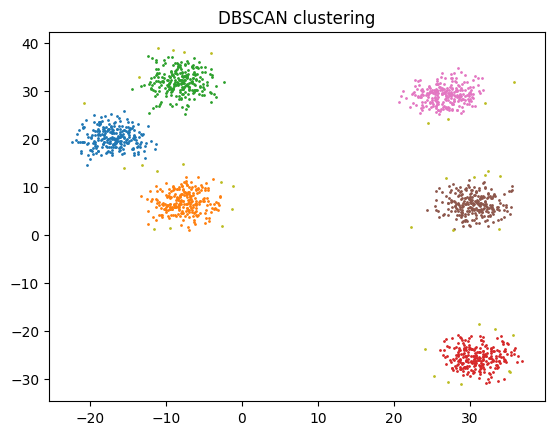

In [151]:
def plot_data_db_scan(data, clusters, ax=None):

    if ax is None:
        _,ax = plt.subplots()
    ax.set_title('DBSCAN clustering')
    for i, cluster_idxs in enumerate(clusters):
        samples = data[cluster_idxs]
        ax.scatter(samples[:,0], samples[:,1], s=1)

plot_data_db_scan(data, [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8, noise])